In [28]:
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math



In [64]:

# Set random seed
np.random.seed(2)

random_start = np.random.rand(100)
starting_state = np.where(random_start>0.5, 1, 0)

def get_data(algorithm, run_times,length=50,t_pct=0.1,**args):
    state = []
    fit = []
    dur = []
    for n in range(run_times):
        start_time = datetime.now()
        fitness = mlrose.FourPeaks(t_pct=t_pct)
        problem_fit = mlrose.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True, max_val = 2)
        _state, _fit = algorithm(problem_fit, **args)
        time_diff = datetime.now() - start_time
        _dur = time_diff.microseconds/1000

        state.append(_state)
        fit.append(_fit)
        dur.append(_dur)
    return np.mean(fit),np.mean(dur)

def by_max_iters(algorithm, run_times, max_iters, **args):
    fit = []
    dur = []
    for i in max_iters:
        _fit, _dur = get_data(algorithm, run_times, max_iters=i, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

max_iters=range(1, 5000, 500)
run_times=3


Text(0.5, 1.0, 'Iteration Vs. Best Fitness')

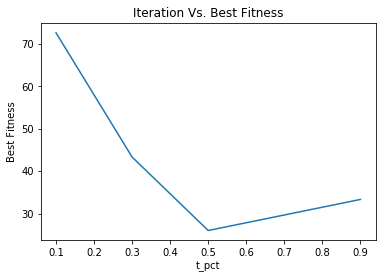

In [65]:
# Optimization

# Set random seed
np.random.seed(2)

params = [0.1,0.3,0.5,0.9]
def optimize(algorithm, run_times, **args):
    fit = []
    dur = []  
    for i in params:
        _fit, _dur = get_data(algorithm, run_times, t_pct=i, pop_size=300, max_attempts = 10, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

fit_ga, dur_ga = optimize(mlrose.mimic, 3)
plt.xlabel('t_pct')
plt.ylabel('Best Fitness')
plt.plot(params, fit_ga)
plt.title('Iteration Vs. Best Fitness')

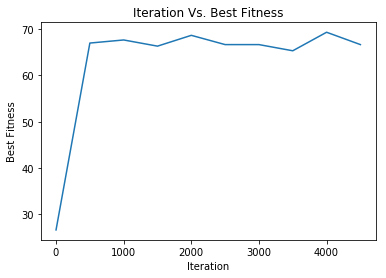

In [66]:
fit_ga, dur_ga = by_max_iters(mlrose.genetic_alg, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

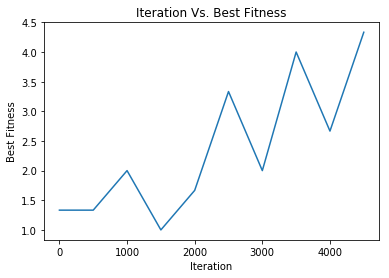

In [67]:
fit_rhc, dur_rhc = by_max_iters(mlrose.random_hill_climb, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_rhc)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

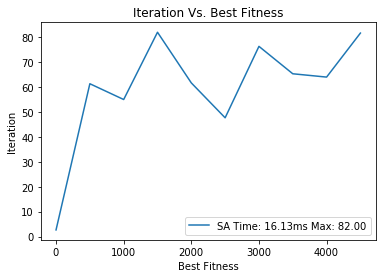

In [68]:
fit_sa, dur_sa = by_max_iters(mlrose.simulated_annealing, run_times, max_iters, schedule=mlrose.ExpDecay())
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_sa, label='SA Time: %0.2fms Max: %0.2f'%(np.mean(dur_sa),np.max(fit_sa)))
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()

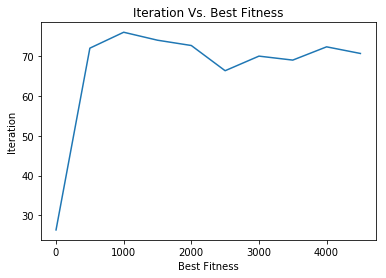

In [69]:
fit_mi, dur_mi = by_max_iters(mlrose.mimic, run_times, max_iters, pop_size=300, keep_pct=0.2, max_attempts = 10)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_mi)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

In [70]:
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_rhc,fit_sa,fit_mi]),columns=['ga','rhc','sa','mimic'],index=max_iters)
duration_df = pd.DataFrame(np.column_stack([dur_ga,dur_rhc,dur_sa,dur_mi]),columns=['ga','rhc','sa','mimic'],index=max_iters)
print(fitness_df)



             ga       rhc         sa      mimic
1     26.666667  1.333333   2.666667  26.333333
501   67.000000  1.333333  61.333333  72.000000
1001  67.666667  2.000000  55.000000  76.000000
1501  66.333333  1.000000  82.000000  74.000000
2001  68.666667  1.666667  61.666667  72.666667
2501  66.666667  3.333333  47.666667  66.333333
3001  66.666667  2.000000  76.333333  70.000000
3501  65.333333  4.000000  65.333333  69.000000
4001  69.333333  2.666667  64.000000  72.333333
4501  66.666667  4.333333  81.666667  70.666667


Text(0, 0.5, 'Best Fitness')

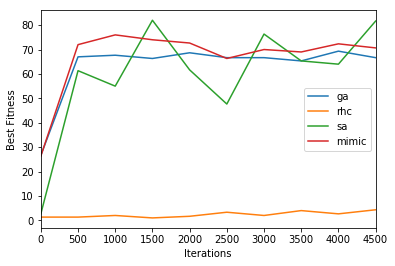

In [71]:
fig, ax = plt.subplots()
fitness_df.plot(ax=ax)
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")

Text(0, 0.5, 'Time(ms)')

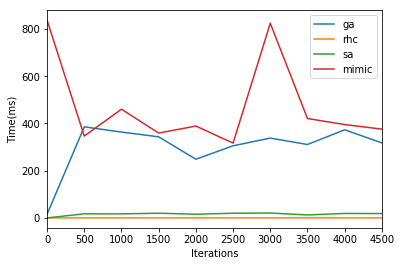

In [72]:
plt.close()
fig, ax = plt.subplots()
duration_df.plot(ax=ax)
plt.xlabel("Iterations")
plt.ylabel("Time(ms)")